# Fundamental solution for elasticity

The displacements ($\mathbf{u}$) of a linear elastic solid are given by the following system of equations

$$(\lambda + 2\mu)\nabla(\nabla\cdot \mathbf{u})
- \mu\nabla\times\nabla\times\mathbf{u} + \mathbf{f} = \mathbf{0}\, ,$$

where $\lambda$ and $\mu$ are the Lamé parameters, and $\mathbf{f}$ are
the forces per unit volume.

## 2D case

According to Banerjee (1994) the Green function is given by

$$G_{ik}(\mathbf{x}, \mathbf{y}) = -\frac{1}{8\mu(1-\nu)}\left[(3 -4\nu)\delta_{ik}\log(r) - \frac{(x_i -  y_i)(x_i - y_i)}{r^2}\right]\, .$$

Where we can see that the Green function in this case is a second-order
tensor. This is because the Green function should map (unit) forces
to displacements.


In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [3]:
try:
    repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
    style = repo + "/styles/clean.mplstyle"
    plt.style.use(style)
except:
    pass

In [4]:
def green_disp_2d(r_vec, mu, nu):
    """Green function for Laplace equation
    
    Parameters
    ----------
    r_vec : float
        Vector between the two points

    Returns
    -------
    G : ndarray, float
        Values of the Green_function
    """
    r = np.linalg.norm(r_vec, axis=0)
    G = -(3 - 4*nu)*np.einsum('ij,k', np.eye(2), np.log(r)) + np.einsum('ij,kj->ikj', r_vec, r_vec/r**2)
    return G/(8*mu*(1 - nu))

### Single load


If we fix the coordinate system in $(0, 0)$ we can write it as

$$G(\mathbf{x}) = -\frac{1}{8\mu(1-\nu)r^2}\begin{bmatrix}
&(3 -4\nu)r^2\log(r) - x^2 & - xy\\
&-xy &(3 -4\nu)r^2\log(r) - y^2 
\end{bmatrix}\, .$$


Thus, if we have a unit load in the horizontal direction, the displacement field
is given by $u_i = P G_{ij} e_j$, or

$$\mathbf{u}(\mathbf{x}) =
-\frac{P}{8\mu(1-\nu)}\left[\left((3 -4\nu)\log(r) - \frac{x^2}{r^2}\right)\hat{\mathbf{e}}_x -\frac{xy}{r^2}\hat{\mathbf{e}}_y\right]\, .$$

In [5]:
npts = 500
y, x = 4*np.mgrid[-1:1:npts*1j, -1:1:npts*1j]

In [6]:
r_vec = np.vstack([x.flatten(), y.flatten()])
G = green_disp_2d(r_vec, 1, 0.3)

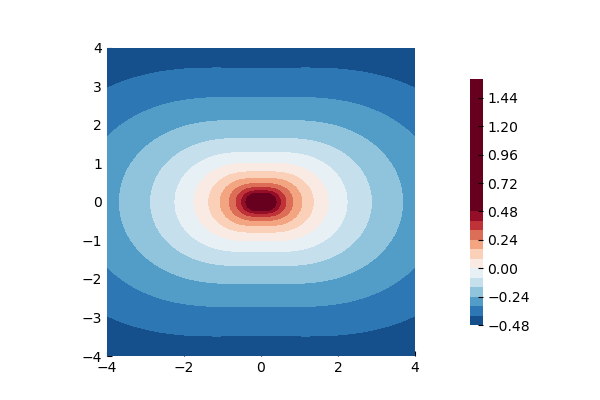

In [7]:
plt.figure()
plt.contourf(x, y, np.reshape(G[0, 0, :], (npts, npts)),
             24, cmap="RdBu_r", vmin=-0.5, vmax=0.5,
             zorder=4)
cbar = plt.colorbar(shrink=0.8)
plt.axis("image");

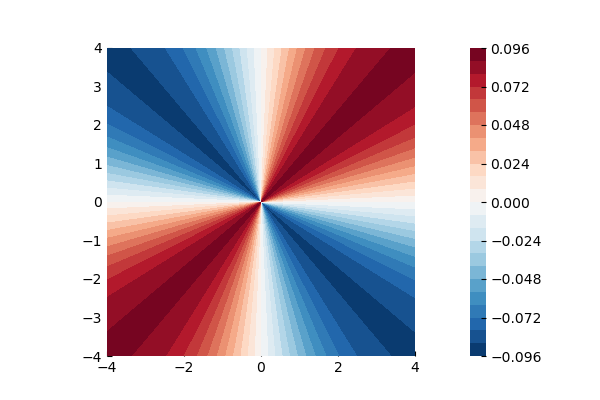

In [8]:
plt.figure()
plt.contourf(x, y, np.reshape(G[0, 1, :], (npts, npts)),
             24, cmap="RdBu_r", zorder=4)
plt.colorbar()
plt.axis("image");

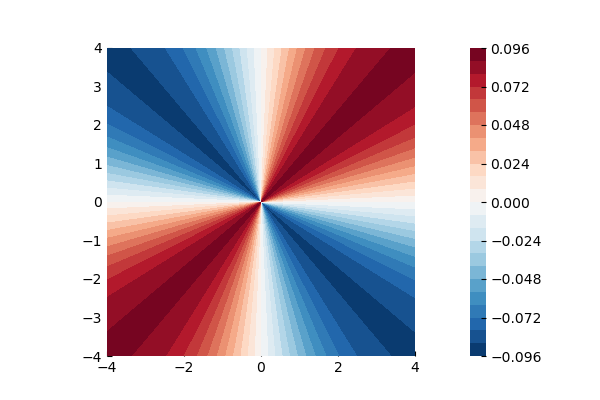

In [9]:
plt.figure()
plt.contourf(x, y , np.reshape(G[1, 0, :], (npts, npts)),
             24, cmap="RdBu_r", zorder=4)
plt.colorbar()
plt.axis("image");

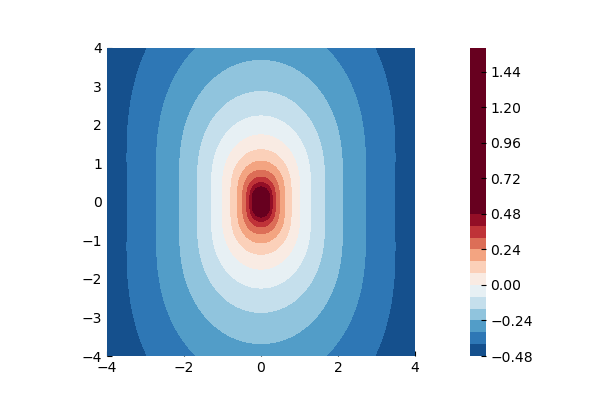

In [10]:
plt.figure()
plt.contourf(x, y , np.reshape(G[1, 1, :], (npts, npts)),
             24, cmap="RdBu_r", vmin=-0.5, vmax=0.5,
             zorder=4)
plt.colorbar()
plt.axis("image");

In [11]:
u = np.einsum("ijk, i", G, np.array([1, 0]))

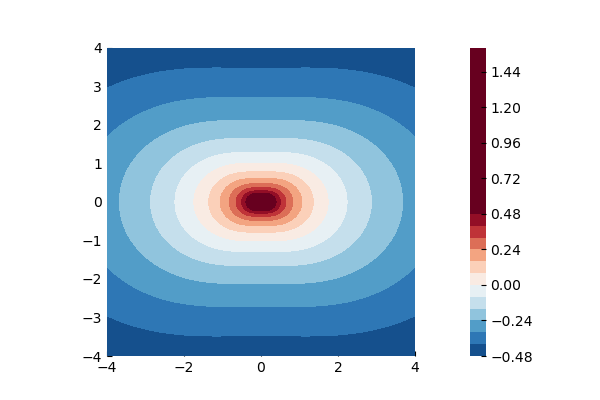

In [12]:
plt.figure()
plt.contourf(x, y, np.reshape(u[0, :], (npts, npts)),
             24, cmap="RdBu_r", vmin=-0.5, vmax=0.5,
             zorder=4)
plt.colorbar()
plt.axis("image");

In [13]:
nu = 0.3
mu = 1.0
r = np.sqrt(x**2 + y**2)
ux = -1/(8*mu*(1 - nu))*((3 - 4*nu)*np.log(r) - x**2/r**2)

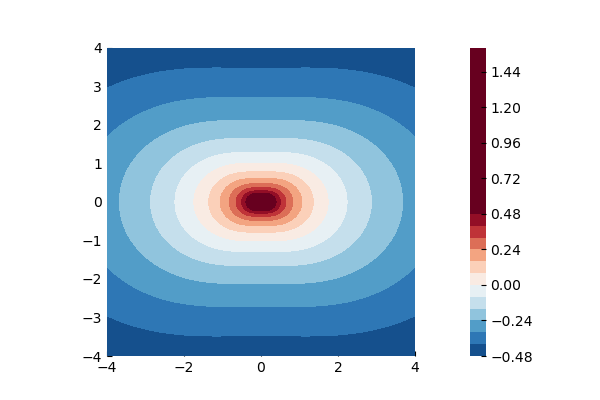

In [14]:
plt.figure()
plt.contourf(x, y, ux,
             24, cmap="RdBu_r", vmin=-0.5, vmax=0.5,
             zorder=4)
plt.colorbar()
plt.axis("image");

### Two loads

In [15]:
nu = 0.25
pt_x = np.exp(1/(3 - 4*nu))
cx = 2
npts = 500
y, x = 8*np.mgrid[-1:1:npts*1j, -1:1:npts*1j]
r1_vec = np.vstack([(x - cx).flatten(),
                   y.flatten()])
r2_vec = np.vstack([(x + cx).flatten(),
                   y.flatten()])
P1 = np.array([0.0, 1.0])
P2 = -np.array([0.0, 1.0])

In [16]:
G1 = green_disp_2d(r1_vec, 1, nu)
G2 = green_disp_2d(r2_vec, 1, nu)

In [17]:
u = np.einsum("ijk,i", G1, P1) + np.einsum("ijk,i", G2, P2)

Text(0, 0.5, '$y$')

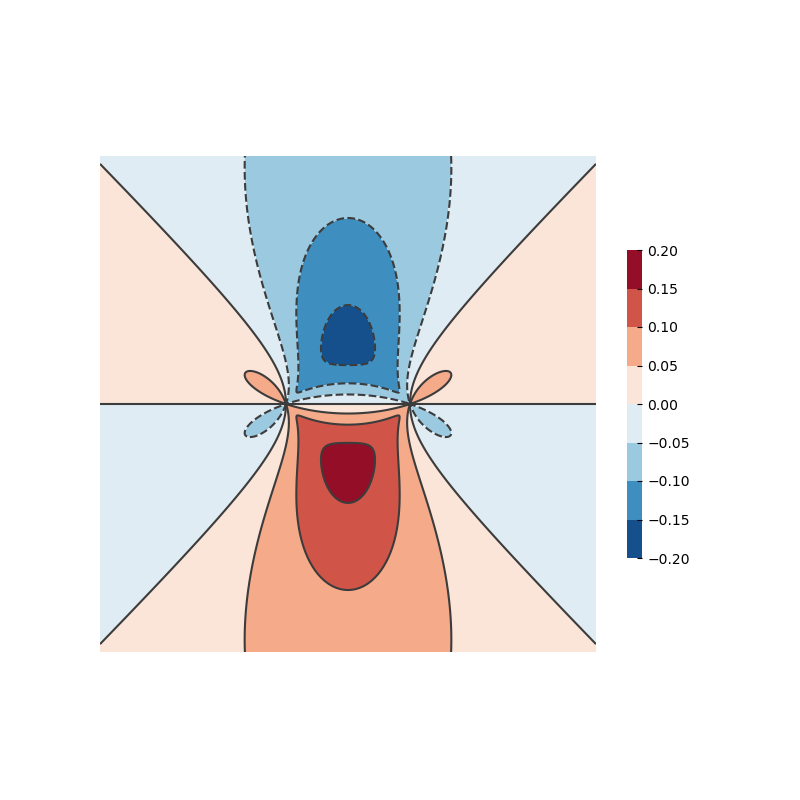

In [18]:
plt.figure(figsize=(8, 8))
plt.contourf(x, y, np.reshape(u[0, :], (npts, npts)), cmap="RdBu_r")
plt.colorbar(shrink=0.5)
plt.contour(x, y, np.reshape(u[0, :], (npts, npts)), colors="#3c3c3c")
plt.axis("image")
plt.axis("off")
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0, 0.5, '$y$')

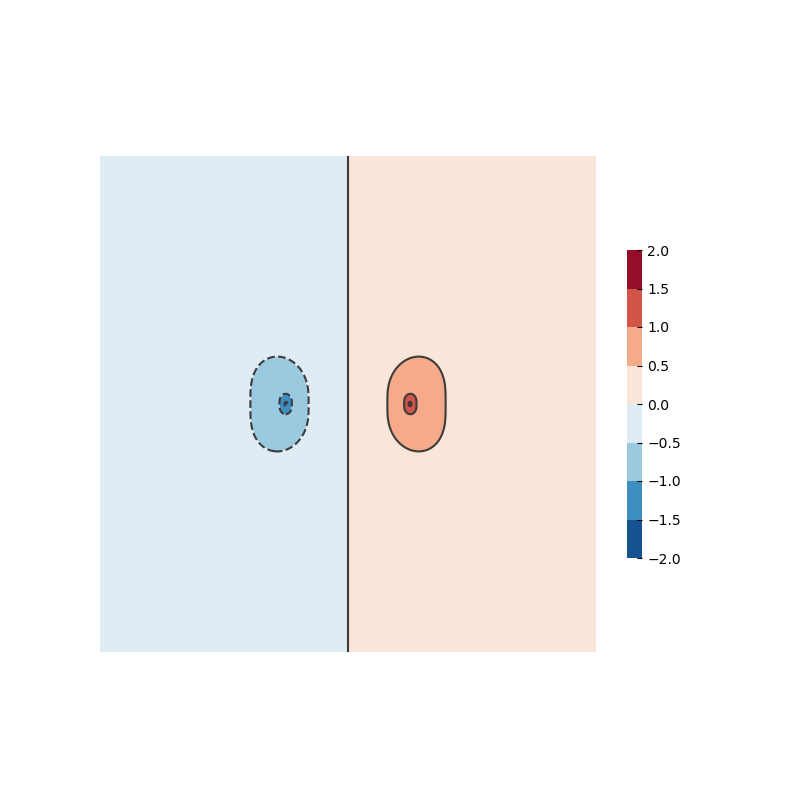

In [19]:
plt.figure(figsize=(8, 8))
plt.contourf(x, y, np.reshape(u[1, :], (npts, npts)), cmap="RdBu_r")
plt.colorbar(shrink=0.5)
plt.contour(x, y, np.reshape(u[1, :], (npts, npts)), colors="#3c3c3c")
plt.axis("image")
plt.axis("off")
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0, 0.5, '$y$')

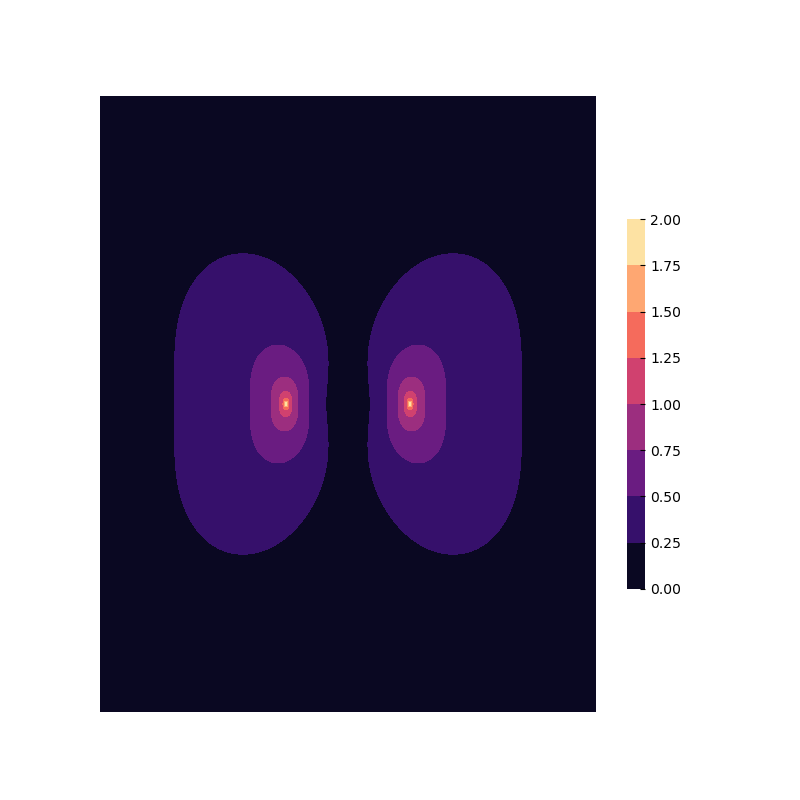

In [20]:
plt.figure(figsize=(8, 8))
umag = np.linalg.norm(u, axis=0)
plt.contourf(x, y, np.reshape(umag, (npts, npts)), cmap="magma")
plt.colorbar(shrink=0.6)
plt.axis("off")
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0, 0.5, '$y$')

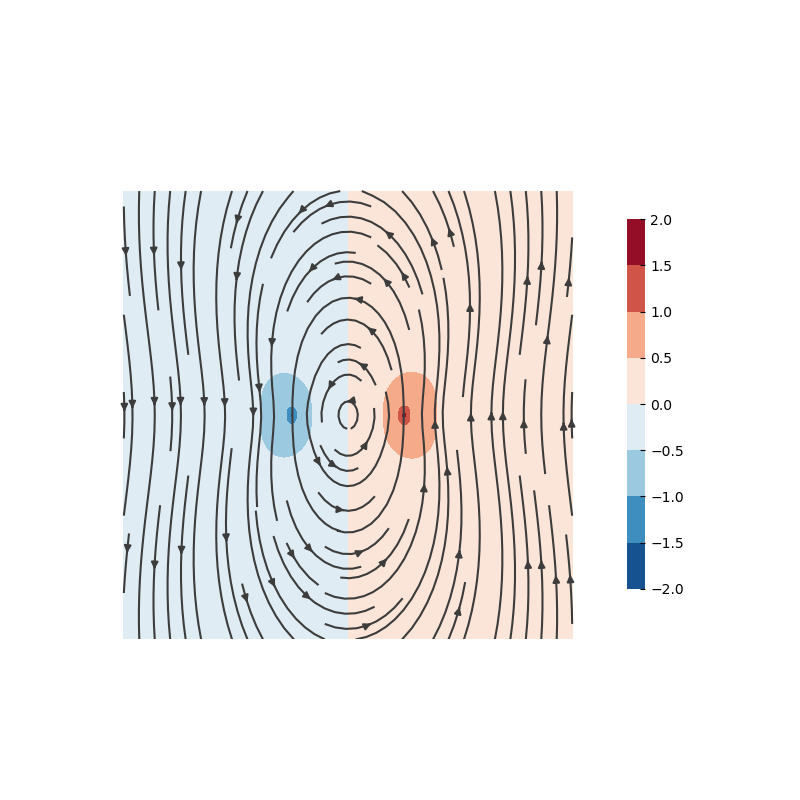

In [21]:
plt.figure(figsize=(8, 8))
plt.contourf(x, y, np.reshape(u[1, :], (npts, npts)), cmap="RdBu_r")
plt.colorbar(shrink=0.6)
plt.streamplot(x , y,
               np.reshape(u[0, :], (npts, npts)),
               np.reshape(u[1, :], (npts, npts)),
               color="#3c3c3c")
plt.axis("image")
plt.axis("off")
plt.xlabel("$x$")
plt.ylabel("$y$")

## References 

1. Banerjee, P. K. (1994). The boundary element methods in engineering (2nd ed). McGraw-Hill.
